In [492]:
# Correlation analysis between two variables to test their association
# Data_Source ID: 1484 => Mexico Athropods .. => Israel Butterflies (1481)
# variable_1 = year & variable_2 = number 
# FINAL DATA: 63 Dragonflies & 1418 Dragonflies

#Importing Data
import pandas as pd 
df = pd.read_csv("data/InsectAbundanceBiomassData.csv") 
df = pd.DataFrame(df, columns= ['Year','Number'])
#print (df)
grouped = df.groupby('Year')
df_some_rows1418 = df[29691:29703]
#df_some_rows63 = df[0:30]
#df_some_rows63
df_some_rows1418
#df_some_rows=df_some_rows63,df_some_rows1418
#df_some_rows
#df_some_rows.head()
#df_some_rows.tail()


,Year,Number
29691,1978,1385.343
29692,1979,1776.150
29693,1980,758.044
29694,1981,919.513
29695,1982,1501.865
29696,1983,1519.889
29697,1984,886.119
29698,1985,909.048
29699,1986,1044.746
29700,1987,859.456


In [493]:
import numpy as np
import scipy.stats

#x = df_some_rows63['Year']
#y = df_some_rows63['Number']

x = df_some_rows1418['Year']
y = df_some_rows1418['Number']

scipy.stats.pearsonr(x,y)




r, p = scipy.stats.pearsonr(x,y)
p=round(p,4)      #attempted rounding all p and r values but did not work... 
#print(p)
r=round(r,4)
#print(r)
print('r = '+str(round(r,4)))

print('p-value = '+ str(round(p,4)))

 

r = -0.538
p-value = 0.0712


A negative r implies one variable increases while the other decreases. The P-value implies there is a 7% chance our null hypothesis is valid.

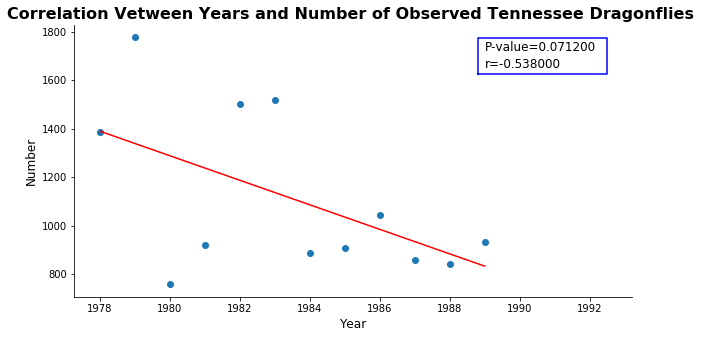

In [502]:
# Correlation Scatterplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

fig = plt.figure( figsize = (10,5))

ax = plt.axes()
plt.scatter(x,y)
slope, intercept, r_value, p_value, std_err=stats.linregress(x,y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(1989,1720,('P-value=%f'%p),fontsize=12)
plt.text(1989,1650,('r=%f'%r),fontsize = 12)

ax.plot([1988.8,1992.5,1992.5,1988.8,1988.8],[1625,1625,1774,1774,1625],color="blue")


plt.ylabel('Number', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.title('Correlation Vetween Years and Number of Observed Tennessee Dragonflies ', fontsize = 16, fontweight = 'bold')
plt.show()


In [498]:
# Regression analysis; Can one variabe predict another? 
res = stats.linregress(x, y)
#print(res)

print(f"R^2: {res.rvalue**2:.6f}")
print ('r =',res.rvalue)
print("slope = ", res.slope)
print("intercept =", res.intercept)



R^2: 0.289463
r = -0.5380178195353545
slope =  -50.528486013986
intercept = 101334.6034254079


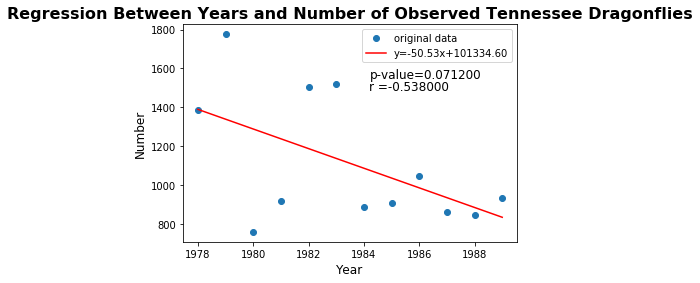

In [503]:
# Regression Scatterplot w/ line of best fit 

plt.plot(x, y, 'o', label='original data')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(1984.2,1550,('p-value=%f'%p),fontsize=12)
plt.text(1984.2,1488,('r =%f'%r),fontsize = 12)


line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.ylabel('Number', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.title('Regression Between Years and Number of Observed Tennessee Dragonflies', fontsize = 16, fontweight = 'bold')

plt.legend(loc='upper right')
plt.show()

In [504]:
# Mean and sd calculations
df_mean=pd.DataFrame(df_some_rows1418)
#print(df_mean)
mean=df_mean.mean()
print(mean)
sd = df_mean.std()
print(sd)

#attempted calculating mean manually but realized was not needed but did not want to delete because spent time on this, sorry

Year      1983.500000
Number    1111.351417
dtype: float64
Year        3.605551
Number    338.618984
dtype: float64


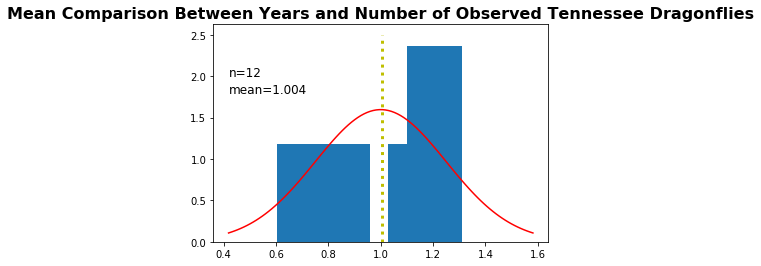

In [527]:
# Mean comparison between two categories within a single variable 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 

mean = 1
sd = 0.25
sample_size = 12    #was calculated by hand with ranges provided in first cell of code 

fig, ax = plt.subplots(1, 1)

sample = np.random.normal(mean, sd, sample_size)
#print(sample)
plt.hist(sample, density = 'true')

x = np.linspace(stats.norm.ppf(0.01, mean, sd), stats.norm.ppf(0.99,mean, sd),100)
y = stats.norm.pdf(x, mean, sd)
plt.plot(x,y, '-r') 

plt.title('Mean Comparison Between Years and Number of Observed Tennessee Dragonflies', size = 16,fontweight = 'bold')
plt.text(stats.norm.ppf(0.01, mean, sd), 2.0, 'n='+str(sample_size), size = 12)
plt.text(stats.norm.ppf(0.01, mean, sd), 1.8, 'mean='+str(round(np.mean(sample),3)), size = 12)
plt.plot([np.mean(sample),np.mean(sample)],[0,2.5],':y', lw=3)

fig.show()

In [528]:
# Chi-square analysis comparing two categoriacal varaibles 
from scipy import stats

X = stats.chisquare(x)
print(X)
print()
print('Chi-square statistic = ' + str(X.statistic))
print('p-value = ' + str(round(X.pvalue,4)))
 
# Resulting table of expected values (good formatting) 


Power_divergenceResult(statistic=11.502553399336875, pvalue=1.0)

Chi-square statistic = 11.502553399336875
p-value = 1.0


In [529]:
# Contingency table 
import numpy as np

data = np.array(df_some_rows1418)
X = stats.chi2_contingency(data)

print(X)

(685.2599322739087, 7.7853535787774465e-140, 11, array([[2155.57709962, 1207.76590038],
       [2406.68743736, 1348.46256264],
       [1754.82100522,  983.22299478],
       [1858.94789796, 1041.56510204],
       [2232.82002822, 1251.04497178],
       [2245.01256961, 1257.87643039],
       [1839.46828783, 1030.65071217],
       [1854.80445914, 1039.24354086],
       [1942.41463698, 1088.33136302],
       [1824.30259676, 1022.15340324],
       [1814.82492108, 1016.84307892],
       [1872.31906023, 1049.05693977]]))


In [530]:
# Resulting table of expected values (good formatting) 
data_df = pd.DataFrame(data,index = ["      1","      2","      3","      4","      5","      6","      7","      8","      9","      10","      11","      12"], columns = ["Year","Number"])

chi2, p, dof, expected = stats.chi2_contingency(data_df)

print('Resulting Table of Expected Values:')
print()
print(data_df)
print()
print('Chi-square results:')
print()
print('   chi-square = '+ str(round(chi2,4)))
print('   p-value = '+ str(round(p,4)))
print('   degrees of freedom = '+ str(dof))
print()


Resulting Table of Expected Values:

            Year    Number
      1   1978.0  1385.343
      2   1979.0  1776.150
      3   1980.0   758.044
      4   1981.0   919.513
      5   1982.0  1501.865
      6   1983.0  1519.889
      7   1984.0   886.119
      8   1985.0   909.048
      9   1986.0  1044.746
      10  1987.0   859.456
      11  1988.0   843.668
      12  1989.0   932.376

Chi-square results:

   chi-square = 685.2599
   p-value = 0.0
   degrees of freedom = 11



Thank you for everything! Have a great Summer! 